In [1]:
import datetime
import scipy.io
import cv2
import numpy as np
import pickle
from sklearn.tree import DecisionTreeClassifier

from main_test import virtual_main
from models import AnonymousColorDetector

# 预测

In [2]:
model_path = 'models/dt_2022-07-19_16-03.model'
img_path = 'data/dataset/img/yangeng.bmp'

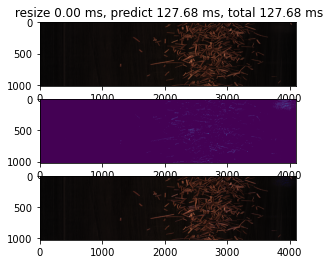

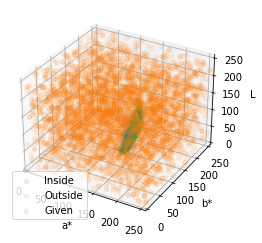

In [3]:
img = cv2.imread(img_path)[:, :, ::-1]
detector = AnonymousColorDetector(file_path=model_path)
result = detector.predict(img)
virtual_main(detector, test_img=img_path, test_model=True)

In [4]:
dataset_path = 'data/dataset/dataset_2022-07-19_16-03.mat'

In [5]:
new_dataset_path = datetime.datetime.now().strftime("data/dataset/dataset_%Y-%m-%d_%H-%M.mat")

In [6]:
data = scipy.io.loadmat(dataset_path)
x, y = data['x'], data['y']

In [7]:
nimg = img[result == 0]

In [8]:
ny = np.ones(shape=(1, nimg.shape[0]))

In [9]:
x = np.concatenate((x,nimg),axis=0)
y = np.concatenate((y,ny),axis=1)

In [10]:
scipy.io.savemat(new_dataset_path, {'x': x, 'y': y})